In [75]:
# importing libraries first
import pandas as pd
import matplotlib.pyplot as plt# joining the departments
import seaborn as sns
from sklearn.cross_validation import train_test_split

In [76]:
# reading the data
data = pd.read_table("IBM_people_dataset.csv")
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [77]:
# converting attrition into categories
# first we will say that the column present categories,
# then we will tell the correct order of that categories
# in the end we will ask python to conver the categories into codes
data["Attrition"] = data["Attrition"].astype('category').cat.reorder_categories(['No', 'Yes']).cat.codes
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [78]:
# converting business travel into categories
# first we will say that the column present categories,
# then we will specify the correct order of that categories
data["BusinessTravel"] = data["BusinessTravel"].astype('category').cat.reorder_categories(['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']).cat.codes
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [79]:
department = pd.get_dummies(data["Department"])
department.head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [80]:
#Degree of freedom in this case is 2, so we can easliy drop one of the columns
department1 = department.drop(["Human Resources"],axis=1)
department1.head()

,Research & Development,Sales
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [81]:
# dropping the "old" department, as we do not need it anymore
data = data.drop(["Department"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [82]:
# converting EducationField into dummies
educationfield = pd.get_dummies(data["EducationField"])
educationfield.head()

,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [83]:
#Degree of freedom in this case is , so we can easily drop one of the columns. we drop Human Resources to avoid repetition. 
Edf = educationfield.drop(["Human Resources"],axis=1)
Edf.head()

,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,1,0,0


In [84]:
# dropping the "old" EducationField, as we do not need it anymore
data = data.drop(["EducationField"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,1,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,1,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,1,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,1,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,1,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [85]:
# converting Gender into categories
# first we will say that the column present categories,
# then we will specify the correct order of that categories
# in the end we will ask python to conver the categories into codes
data["Gender"] = data["Gender"].astype('category').cat.reorder_categories(['Male', 'Female']).cat.codes
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,1,1,2,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,1,2,3,0,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,1,4,4,0,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,1,5,4,1,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,1,7,1,0,...,4,80,1,6,3,3,2,2,2,2


In [86]:
# converting JobRole into dummies
JobRole = pd.get_dummies(data["JobRole"])
JobRole.head()

,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0


In [87]:
# Degree of freedom in this case is 8, so we can easliy drop one of the columns. 
Jobrole = JobRole.drop(["Human Resources"],axis=1)
Jobrole.head()

,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0


In [88]:
# dropping the "old" JobRole, as we do not need it anymore
data = data.drop(["JobRole"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,1,1,2,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,1,2,3,0,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,1,4,4,0,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,1,5,4,1,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,1,7,1,0,...,4,80,1,6,3,3,2,2,2,2


In [89]:
# dropping the Over18, as we do not need it. It does not have variance and so is not significant. 
data = data.drop(["Over18"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,1,1,2,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,1,2,3,0,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,1,4,4,0,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,1,5,4,1,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,1,7,1,0,...,4,80,1,6,3,3,2,2,2,2


In [90]:
# converting overtime into categories
# first we will say that the column present categories,
# then we will tell the correct order of that categories
# in the end we will ask python to conver the categories into codes
data["OverTime"] = data["OverTime"].astype('category').cat.reorder_categories(['No','Yes']).cat.codes
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,1,1,2,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,1,2,3,0,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,1,4,4,0,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,1,5,4,1,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,1,7,1,0,...,4,80,1,6,3,3,2,2,2,2


In [91]:
# dropping the StandardHours, as information is the same for everyone,the variance is , so we do not need it
data = data.drop(["StandardHours"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,1,1,2,1,...,3,1,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,1,2,3,0,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,1,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,1,5,4,1,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,1,7,1,0,...,3,4,1,6,3,3,2,2,2,2


In [92]:
# dropping the HourlyRate, as there is also MonthlyRate, it can be the case that we could have overlap of information
data = data.drop(["HourlyRate"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,1,1,2,1,...,3,1,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,1,2,3,0,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,1,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,1,5,4,1,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,1,7,1,0,...,3,4,1,6,3,3,2,2,2,2


In [93]:
# dropping the DailyRate, as there is also MonthlyRate, it can be the case that we could have overlap of information
data = data.drop(["DailyRate"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1,2,1,1,2,1,3,...,3,1,0,8,0,1,6,4,0,5
1,0,49,2,8,1,1,2,3,0,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,2,2,1,4,4,0,2,...,3,2,0,7,3,3,0,0,0,0
3,0,33,2,3,4,1,5,4,1,3,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,2,1,1,7,1,0,3,...,3,4,1,6,3,3,2,2,2,2


In [94]:
# dropping the EmployeeCount, as information is the same for everyone,thus the variance is 0, so it is not useful
data = data.drop(["EmployeeCount"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1,2,1,2,1,3,2,...,3,1,0,8,0,1,6,4,0,5
1,0,49,2,8,1,2,3,0,2,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,2,2,4,4,0,2,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,2,3,4,5,4,1,3,1,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,2,1,7,1,0,3,1,...,3,4,1,6,3,3,2,2,2,2


In [95]:
# dropping the MaritalStatus_old, as we have already created a numerical column identifying whether the employee is married or single
data = data.drop(["MaritalStatus_old"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1,2,1,2,1,3,2,...,3,1,0,8,0,1,6,4,0,5
1,0,49,2,8,1,2,3,0,2,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,2,2,4,4,0,2,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,2,3,4,5,4,1,3,1,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,2,1,7,1,0,3,1,...,3,4,1,6,3,3,2,2,2,2


In [96]:
# dropping the EmployeeNumber, because it does not add any value to our calculations
data = data.drop(["EmployeeNumber"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1,2,2,1,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,0,49,2,8,1,3,0,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,2,2,4,0,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,0,33,2,3,4,4,1,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,2,1,1,0,3,1,2,...,3,4,1,6,3,3,2,2,2,2


In [97]:
# creating correlation matrix
data.corr()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,0.127006,0.077924,-0.031373,-0.103369,-0.029453,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,-0.011807,-0.001686,0.208034,0.010146,0.036311,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,0.127006,-0.011807,1.000000,-0.009696,-0.008670,-0.011310,0.044896,0.029300,-0.011696,0.008666,...,0.001683,0.008926,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DistanceFromHome,0.077924,-0.001686,-0.009696,1.000000,0.021042,-0.016075,0.001851,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.008670,0.021042,1.000000,-0.027128,0.016547,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,-0.103369,0.010146,-0.011310,-0.016075,-0.027128,1.000000,-0.000508,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.029453,0.036311,0.044896,0.001851,0.016547,-0.000508,1.000000,-0.017960,0.039403,-0.033252,...,0.013859,-0.022868,-0.012716,0.046881,0.038787,0.002753,0.029747,0.041483,0.026985,0.030599
JobInvolvement,-0.130016,0.029820,0.029300,0.008783,0.042438,-0.008278,-0.017960,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,-0.169105,0.509604,-0.011696,0.005303,0.101589,0.001212,0.039403,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.103481,-0.004892,0.008666,-0.003669,-0.011296,-0.006784,-0.033252,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


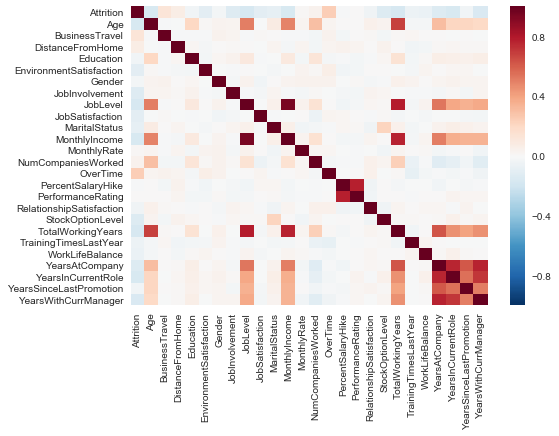

In [98]:
# plotting the correlation matrix
# as seaborn is based on matplotlib, we need to use plt.show() to see the plot
sns.heatmap(data.corr())
plt.show()

In [99]:
# checking the missing values
# ass you see we do not have any
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
Attrition                   1470 non-null int8
Age                         1470 non-null int64
BusinessTravel              1470 non-null int8
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int8
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null int8
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StockOptionLevel            1470 

In [100]:
# descriptive analytics
data.describe()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,1.086395,9.192517,2.912925,2.721769,0.400000,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,0.532170,8.106864,1.024165,1.093082,0.490065,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,1.000000,7.000000,3.000000,3.000000,0.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1.000000,14.000000,4.000000,4.000000,1.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,2.000000,29.000000,5.000000,4.000000,1.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [101]:
# joining the departments
data = data.join(department1)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales
0,1,41,1,1,2,2,1,3,2,4,...,0,8,0,1,6,4,0,5,0,1
1,0,49,2,8,1,3,0,2,2,2,...,1,10,3,3,10,7,1,7,1,0
2,1,37,1,2,2,4,0,2,1,3,...,0,7,3,3,0,0,0,0,1,0
3,0,33,2,3,4,4,1,3,1,3,...,0,8,3,3,8,7,3,0,1,0
4,0,27,1,2,1,1,0,3,1,2,...,1,6,3,3,2,2,2,2,1,0


In [102]:
# joining the educationfield
data = data.join(Edf)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1,41,1,1,2,2,1,3,2,4,...,4,0,5,0,1,1,0,0,0,0
1,0,49,2,8,1,3,0,2,2,2,...,7,1,7,1,0,1,0,0,0,0
2,1,37,1,2,2,4,0,2,1,3,...,0,0,0,1,0,0,0,0,1,0
3,0,33,2,3,4,4,1,3,1,3,...,7,3,0,1,0,1,0,0,0,0
4,0,27,1,2,1,1,0,3,1,2,...,2,2,2,1,0,0,0,1,0,0


In [104]:
# joining the Jobrole
data = data.join(Jobrole)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,Other,Technical Degree,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,1,41,1,1,2,2,1,3,2,4,...,0,0,0,0,0,0,0,0,1,0
1,0,49,2,8,1,3,0,2,2,2,...,0,0,0,0,0,0,0,1,0,0
2,1,37,1,2,2,4,0,2,1,3,...,1,0,0,1,0,0,0,0,0,0
3,0,33,2,3,4,4,1,3,1,3,...,0,0,0,0,0,0,0,1,0,0
4,0,27,1,2,1,1,0,3,1,2,...,0,0,0,1,0,0,0,0,0,0


In [105]:
# learning the percentage of leavers
data["Attrition"].value_counts()/len(data)*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [106]:
# importing the model
from sklearn.tree import DecisionTreeClassifier

In [107]:
# initializing the model
model = DecisionTreeClassifier(random_state=42)

In [108]:
# setting the inputs and output
# inputs are everything except the column attrition
# output is the column attrition
inputs = data.iloc[:,1:]
output = data["Attrition"]

In [109]:
# fitting the model
model.fit(inputs,output)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [110]:
# checking the accuracy
model.score(inputs,output)*100

100.0

In [111]:
# importing the lib for exporting tree visualization code
from sklearn.tree import export_graphviz

In [112]:
# exporting the tree graph and then visualizing in webgraphviz.com
export_graphviz(model,"tree.dot")

In [113]:
# building new model with a max_depth specification
modelFit = DecisionTreeClassifier(max_depth=5, random_state=42)

In [114]:
train, test = train_test_split(data,test_size=0.25)

In [115]:
len(test)

368

In [116]:
train, test = train_test_split(data,train_size=0.75)

In [117]:
len(train)

1102

In [118]:
model_X = DecisionTreeClassifier(max_depth=5, random_state=42)

In [119]:
inputs_train,inputs_test,output_train,output_test = train_test_split(inputs,output,train_size=0.75)

In [120]:
model_X.fit(inputs_train,output_train)
model_X.score(inputs_test,output_test)*100

82.33695652173914

In [121]:
export_graphviz(model_X,"tree_X.dot")

In [122]:
df = pd.DataFrame(index=list(data)[1:],data=model.feature_importances_)
df

,0
Age,0.063571
BusinessTravel,0.012169
DistanceFromHome,0.051999
Education,0.018679
EnvironmentSatisfaction,0.045284
Gender,0.021397
JobInvolvement,0.025504
JobLevel,0.006526
JobSatisfaction,0.054205
MaritalStatus,0.004472


In [123]:
df.sort_values(by=0, ascending=False)

,0
MonthlyIncome,0.130470
Age,0.063571
OverTime,0.060574
JobSatisfaction,0.054205
TotalWorkingYears,0.054046
DistanceFromHome,0.051999
EnvironmentSatisfaction,0.045284
PercentSalaryHike,0.041936
NumCompaniesWorked,0.040957
TrainingTimesLastYear,0.038325


In [124]:
model.predict([0.32,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0], dtype=int8)